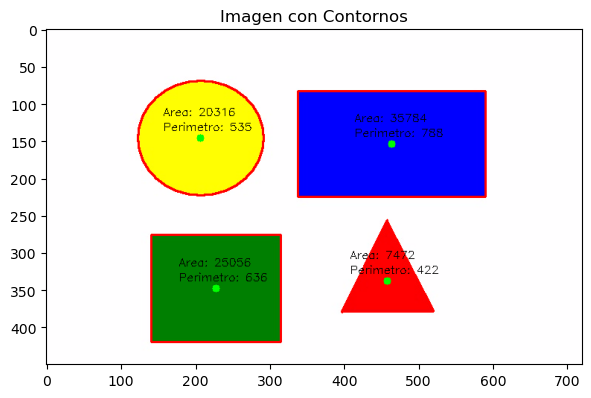

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('figuras_2.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bini, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contar in contornos:
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cx = int(momento["m10"] / momento["m00"])
        cy = int(momento["m01"] / momento["m00"])
    else:
        cx, cy = 0, 0
    
    area = cv2.contourArea(contar)
    perimetro = cv2.arcLength(contar, True)
    cv2.circle(img_rgb, (cx, cy), 5, (0, 255, 0), -1)
    cv2.drawContours(img_rgb, [contar], -1, (255, 0, 0), 2)
    cv2.putText(img_rgb, f'Area: {int(area)}', (cx - 50, cy - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
    cv2.putText(img_rgb, f'Perimetro: {int(perimetro)}', (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

plt.figure(figsize=(40, 20))

plt.subplot(4, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen con Contornos')

plt.show()
